# Solving the n-Queens Problem using Local Search

Student Name: Leilani Guzman

I have used the following AI tools: Github Copilot

I understand that my submission needs to be my own work: LG

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the fontsize to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


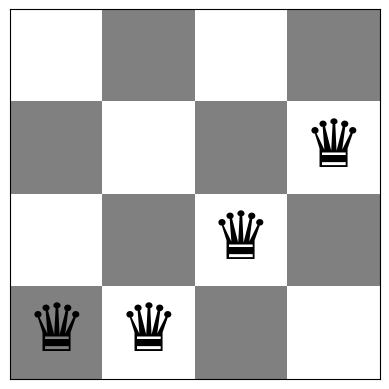

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [45]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


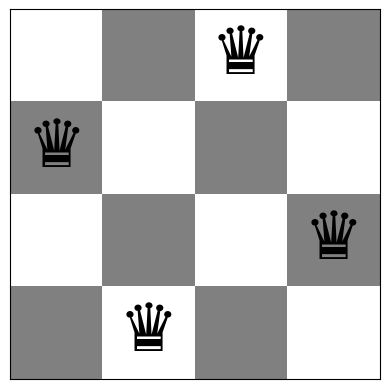

In [46]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [47]:
# Code and description go here
def steepest_ascend(board):
    best = board
    best_conflicts = conflicts(best)

    while True:
        best_move = best
        # For each possible position of moving the queen in a column up or down (queen in a column can only move up or down)
        for col in range(len(board)):
            for row in range(len(board)):
                # Move the queen to new position
                if best[col] == row:
                    continue
                new_board = best.copy()
                new_board[col] = row
                # If new board has fewer conflicts than best, then reassign best
                if conflicts(new_board) < conflicts(best_move):
                    best_move = new_board
        
        if conflicts(best_move) >= best_conflicts:
            # No better moves
            break
        
        best = best_move
        best_conflicts = conflicts(best)

    return best

Board with 21 conflicts.


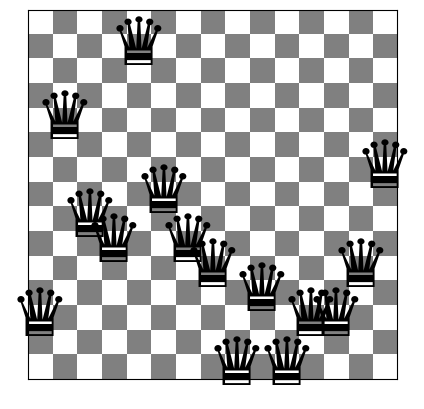

Board with 1 conflicts.


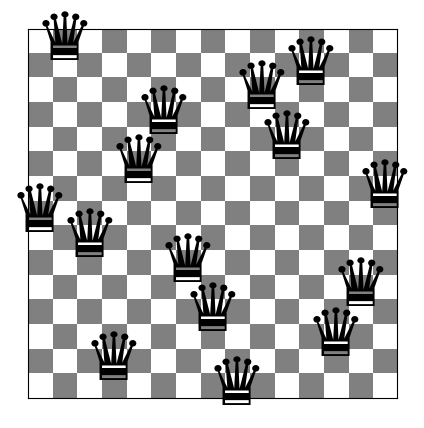

In [48]:
board = random_board(15)
show_board(board)

best_board = steepest_ascend(board)
show_board(best_board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [49]:
# Modify steepest ascend so it randomly chooses between successors with equal number of conflicts
import random

def stochastic_climbing_1(board):
    best = board
    best_conflicts = conflicts(best)

    # Generate all uphill moves
    while True:
        uphill_moves = []
        for col in range(len(board)):
            for row in range(len(board)):
                if best[col] != row:
                    new_board = best.copy()
                    new_board[col] = row
                    if conflicts(new_board) < best_conflicts:
                        uphill_moves.append(new_board)

        # If there are no uphill moves, then return best
        if len(uphill_moves) == 0:
            break
        
        # Randomly pick from uphill moves
        best = random.choice(uphill_moves)
        best_conflicts = conflicts(best)
    
    return best

Board with 11 conflicts.


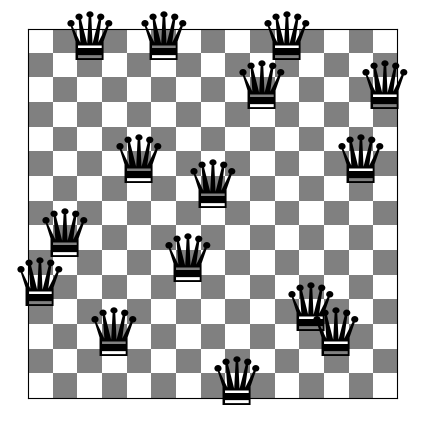

Board with 2 conflicts.


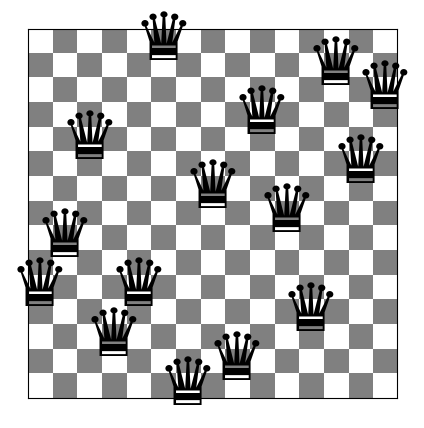

In [50]:
board = random_board(15)
show_board(board)

best_board = stochastic_climbing_1(board)
show_board(best_board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [51]:
def stochastic_climbing_2(board):
    best = board
    best_conflicts = conflicts(best)

    # For each possible position of moving the queen up or down (queen in a column can only move up or down)
    for col in range(len(board)):
        original_row = best[col]
        new_row = original_row
        while original_row == new_row:
            new_row = np.random.randint(0, len(board))
        # Move the queen to new position
        new_board = best.copy()
        new_board[col] = new_row
        # If successor has fewer conflicts than best, then reassign best
        if conflicts(new_board) < best_conflicts:
            best = new_board
            best_conflicts = conflicts(best)
    
    return best

Board with 15 conflicts.


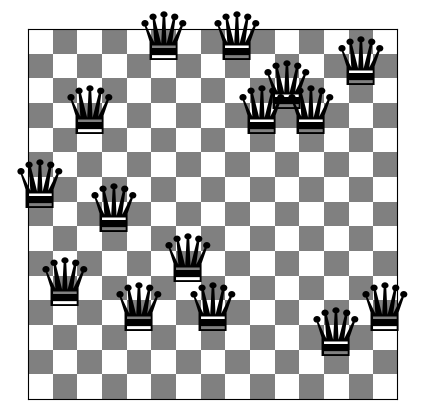

Board with 8 conflicts.


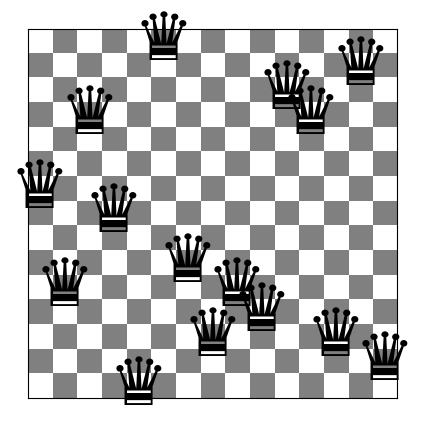

In [52]:
board = random_board(15)
show_board(board)

best_board = stochastic_climbing_2(board)
show_board(best_board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Steepest Ascend Climbing: 0 conflicts.
Board with 0 conflicts.


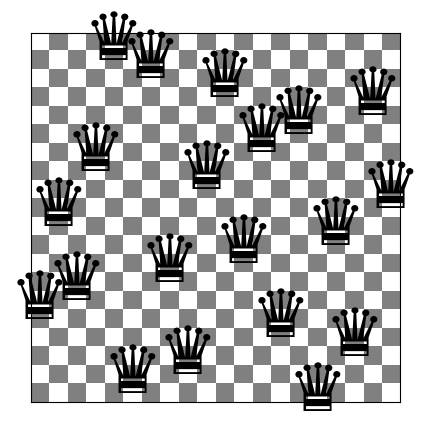

Stochastic Hill Climbing 1: 0 conflicts.
Board with 0 conflicts.


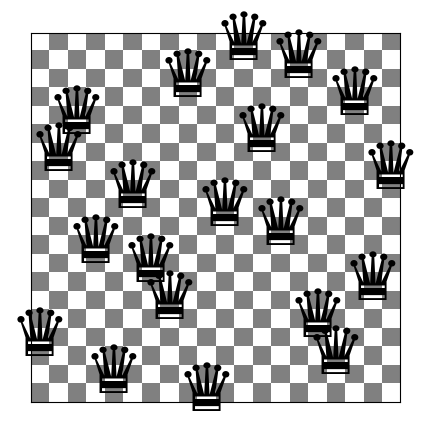

Stochastic Hill Climbing 2: 7 conflicts.
Board with 7 conflicts.


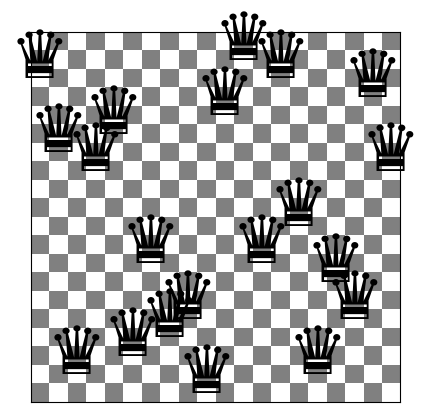

In [53]:
board = random_board(20)
best_board = steepest_ascend(board)
for _ in range(100):
    board = random_board(20)
    new_board = steepest_ascend(board)
    if conflicts(new_board) < conflicts(best_board):
        best_board = new_board


print(f"Steepest Ascend Climbing: {conflicts(best_board)} conflicts.")
show_board(best_board)

board = random_board(20)
best_board = stochastic_climbing_1(board)
for _ in range(100):
    board = random_board(20)
    new_board = stochastic_climbing_1(board)
    if conflicts(new_board) < conflicts(best_board):
        best_board = new_board

print(f"Stochastic Hill Climbing 1: {conflicts(best_board)} conflicts.")
show_board(best_board)

board = random_board(20)
best_board = stochastic_climbing_2(board)
for _ in range(100):
    board = random_board(20)
    new_board = stochastic_climbing_2(board)
    if conflicts(new_board) < conflicts(best_board):
        best_board = new_board

print(f"Stochastic Hill Climbing 2: {conflicts(best_board)} conflicts.")
show_board(best_board)

After running each of the algorithms 100 times with different boards of size 20, it is apparent that both Steepest Ascent and Stochastic Hill Climbing 1 are able to find optimal or very close to optimal solutions. However, these results can fluctuate with different runs and different board sizes. Stochastic Hill Climbing 2 was not able to find the optimal solution, but it was able to find a solution that was somewhat close to optimal, although not as close as the other two (fewer conflicts than the original board).

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [54]:
def schedule(t, t_0):
    return t_0 /(t+1)

def simulated_annealing(board, temp):
    best = board
    best_conflicts = conflicts(best)

    # For each possible position of moving the queen in a column up or down (queen in a column can only move up or down)
    t = 1
    while True:
        T = schedule(t, temp)
        if int(T) < .000001:
            return best
        # Move the queen to new position
        new_board = best.copy()
        col = np.random.randint(0, len(board))
        new_board[col] = np.random.randint(0, len(board))
        delta_E = best_conflicts - conflicts(new_board) 
        if delta_E > 0:
            best = new_board
            best_conflicts = conflicts(best)
        else:
            if np.random.uniform(0,1) >= np.exp(-delta_E/T):
                best = new_board
                best_conflicts = conflicts(best)
        t += 1


Original Board
Board with 14 conflicts.


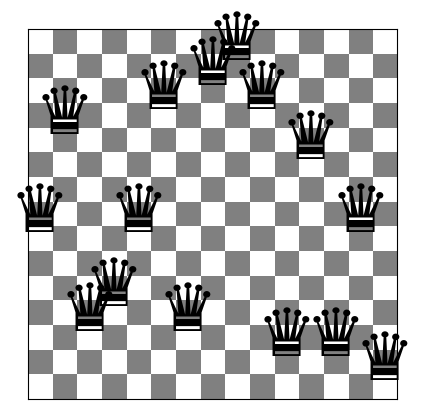

Best Board
Board with 2 conflicts.


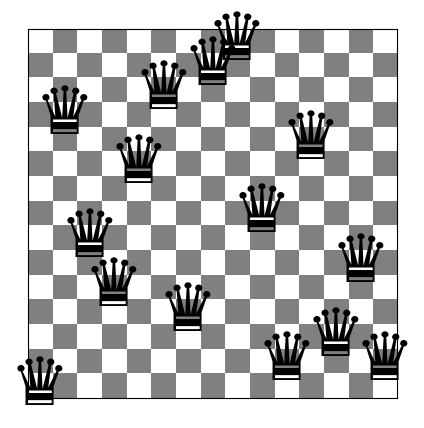

In [55]:
board = random_board(15)
print('Original Board')
show_board(board)

temp = 20000
best_board = simulated_annealing(board, temp)
print('Best Board')
show_board(best_board)

2. Compared to previous algorithms
    
    The simulated annealing algorithm, based on a couple of sample runs in the above code, seems to find very optimal solutions, similar to Steepest Ascent and Stochastic Hill Climbing. More comparison can be seen in Task 6. 
3. Annealing Schedule
    
    For this implementation of simulated annealing I used the fast simulted annealing schedule which can be represented as: $T_t = T_0 * \frac{1}{1+t}$ where $T_0$ is the initial temperature, and $t$ is the current iteration. This schedule was chosen because it allows the temperature to decrease very quickly, which helps in avoiding local optimum. It was also chosen based on trial and error, the other two types of scheduling, classic and exponential, did not work as well as the fast schedule (they were not able to find the most optimal solutions).

## Task 6: Compare Performance [10 Points]

Use runtime and objective function value to compare the algorithms.

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [56]:
# Code, results, charts and discussion go here
import time

steepest_ascend_conflicts = []
steepest_ascend_runtime = []
stochastic_climbing_1_conflicts = []
stochastic_climbing_1_runtime = []
stochastic_climbing_2_conflicts = []
stochastic_climbing_2_runtime = []
simulated_annealing_conflicts = []
simulated_annealing_runtime = []

board_sizes = [15,20,25,30]

for size in board_sizes:
    conflicts_per_board = []
    runtimes = []

    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = steepest_ascend(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))
    
    steepest_ascend_conflicts.append(np.mean(conflicts_per_board))
    steepest_ascend_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)

        start_time = time.time()
        best_board = stochastic_climbing_1(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))
    
    stochastic_climbing_1_conflicts.append(np.mean(conflicts_per_board))
    stochastic_climbing_1_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = stochastic_climbing_2(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))

    stochastic_climbing_2_conflicts.append(np.mean(conflicts_per_board))
    stochastic_climbing_2_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = simulated_annealing(board, 20000)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))

    simulated_annealing_conflicts.append(np.mean(conflicts_per_board))
    simulated_annealing_runtime.append(np.mean(runtimes))

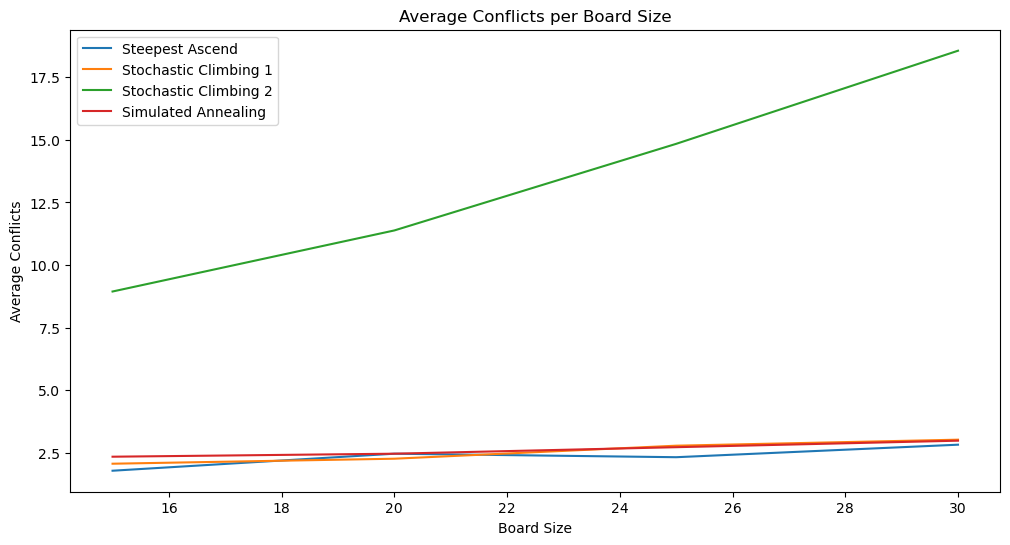

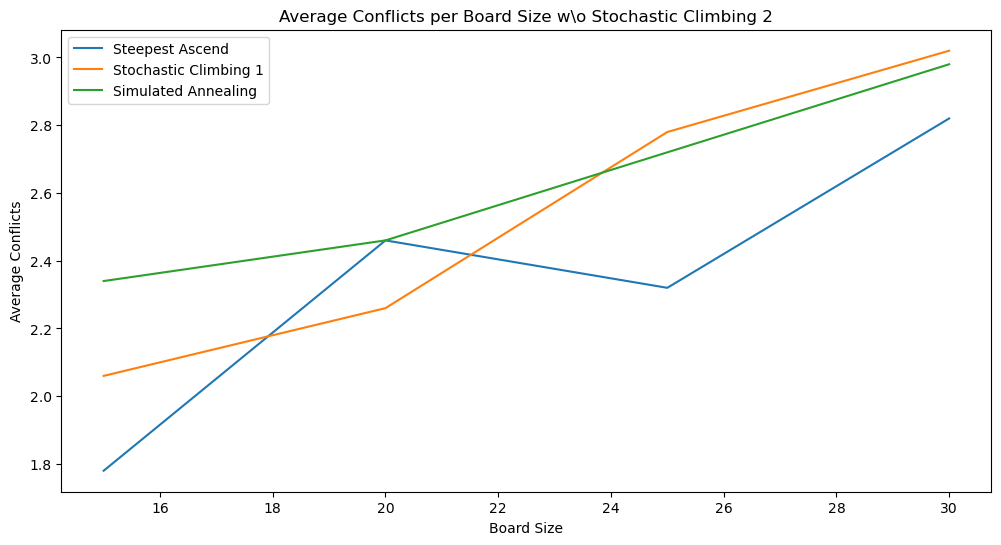

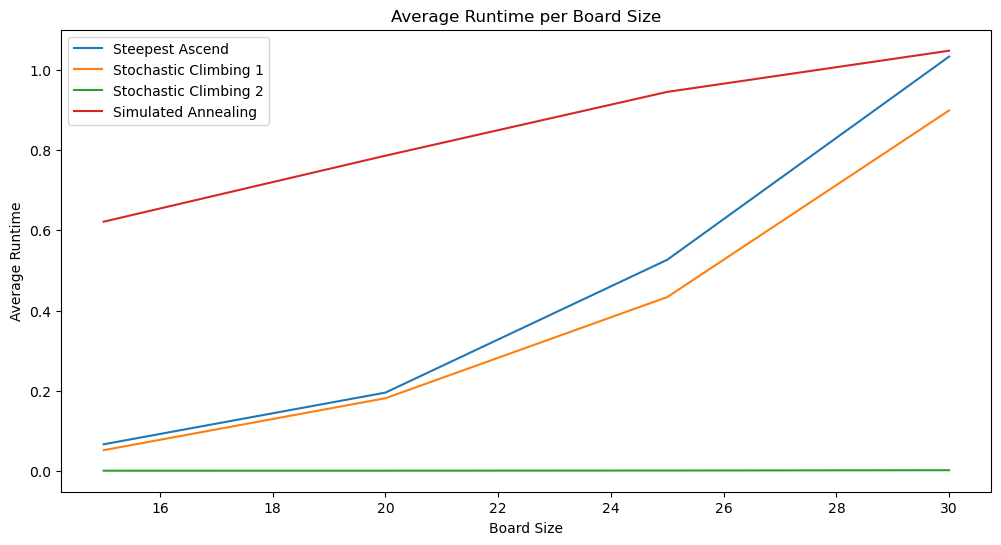

In [57]:
# Plot the results, zoom in so the differences are visible
plt.figure(figsize=(12,6))
plt.plot(board_sizes, steepest_ascend_conflicts, label='Steepest Ascend')
plt.plot(board_sizes, stochastic_climbing_1_conflicts, label='Stochastic Climbing 1')
plt.plot(board_sizes, stochastic_climbing_2_conflicts, label='Stochastic Climbing 2')
plt.plot(board_sizes, simulated_annealing_conflicts, label='Simulated Annealing')
plt.xlabel('Board Size')
plt.ylabel('Average Conflicts')
plt.title('Average Conflicts per Board Size')
plt.legend()

# Plot the average conflicts per board size without stochastic climbing 2, zoomed in version
plt.figure(figsize=(12,6))
plt.plot(board_sizes, steepest_ascend_conflicts, label='Steepest Ascend')
plt.plot(board_sizes, stochastic_climbing_1_conflicts, label='Stochastic Climbing 1')
plt.plot(board_sizes, simulated_annealing_conflicts, label='Simulated Annealing')
plt.xlabel('Board Size')
plt.ylabel('Average Conflicts')
plt.title('Average Conflicts per Board Size w\o Stochastic Climbing 2')
plt.legend()


plt.figure(figsize=(12,6))
plt.plot(board_sizes, steepest_ascend_runtime, label='Steepest Ascend')
plt.plot(board_sizes, stochastic_climbing_1_runtime, label='Stochastic Climbing 1')
plt.plot(board_sizes, stochastic_climbing_2_runtime, label='Stochastic Climbing 2')
plt.plot(board_sizes, simulated_annealing_runtime, label='Simulated Annealing')
plt.xlabel('Board Size')
plt.ylabel('Average Runtime')
plt.title('Average Runtime per Board Size')
plt.legend()
plt.show()

The above code is comparing the average number of conflicts and average runtime for each of the algorithms. Each of them were run for 4 different board sizes: 15, 20, 25, 30. For each board size, the algorithm was run 50 times with a different board layout each time. The average number of conflicts and average runtime were then calculated for each algorithm and board size. The results can be seen above in graphs.

1. How do the algorithms scale?
    
    In terms of average number of conflicts, the Stochastic Hill Climbing 2 appears to have the most average number of conflicts across all board sizes, meanwhile the other 3 are fairly similar. The second graph shows a zoomed in look at these other 3 algorithms, and from this it appears that the next most average number of conflicts is with Simulated Annealing, and then Stoachastic Hill Climbing 1, and finally Steepest Ascent with the least average number of conflicts.
    In terms of average runtime, however, Simulated Annealing took the longest. So although this algorithm performs very similar to the Steepest Ascent and Stochastic Hill Climbing 1 in terms of average number of conflicts, it takes much longer to run. Both Steepest Ascent and Stochastic Hill Climbing 1 have very similar average runtimes, with Steepest Ascent having a slightly longer runtime consistently throughout different board sizes. Stochastic Hill Climbing 2 has the shortest average runtime, which is expected since it has the most average number of conflicts, meaning it is not working as hard/long enough to find the optimal solution.

2. What is the largest board each algorithm can solve in a reasonable amount time?
    
    For this problem at hand I decided about 5 minutes was a reasonable amount of time. 
    - For Steepest Ascent the largest board that it can solve is around 140x140. This was determined by running the algorithm above in task 2 at different board sizes until the time was around 5 minutes.
    - For Stochastic Hill Climbing 1 the largest board that it can solve is around 130x130 in about 5 minutes and 33 seconds.
    - For Stochastic Hill Climbing 2 the largest board that it can solve is around 110000x110000 in about 4 minutes and 32 seconds. In this case solving means finding the most optimal solution that it is capable of doing. This algorithm is able to find solutions a lot faster than other algorithms, which is why it is able to solve such a large board in a reasonable amount of time. However, it is not finding the most optimal solution, it simply just reduces the number of conflicts as much as it can in the time it is given.
    - For Simulated Annealing the largest board that it can solve is around 10000x10000 in about 5 minutes 40 seconds. Compared to Stochastic Hill Climbing 2, it has a slower runtime, as it can only solve a smaller board in a similar amount of time, but it is able to reduce the number of conflicts more so than Stochastic Hill Climbing 2. If it were to use a slower cooling schedule then perhaps it would find more optimal solutions, but it would take much longer to run. In the case of smaller boards it is much more reasonable to use a slower annealing schedule, but once the board is too large it becomes unreasonable.

## Graduate student advanced task: Exploring other Local Moves [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Implement a few different local moves. Implement:

* moving a queen only one square at a time
* switching two columns
* more moves which move more than one queen at a time.

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [58]:
# Moving queen one square at a time
def stochastic_climbing_3(board):
    best = board
    best_conflicts = conflicts(best)

    # For each possible position of moving the queen in a column up or down (queen in a column can only move up or down)
    for col in range(len(board)):
        original_row = board[col]
        for moves in [-1,1]:
            row = (original_row + moves) % len(best)
            if row != original_row:
                # Move the queen to new position
                new_board = best.copy()
                new_board[col] = row
                
                if conflicts(new_board) <= best_conflicts:
                    best = new_board
                    best_conflicts = conflicts(best)
    
    return best

# Switching columns
def stochastic_climbing_4(board):
    best = board
    best_conflicts = conflicts(best)
    tries = 0

    while tries < len(board) * 2:
        # Randomly choose two different columns
        col_1, col_2 = random.sample(range(len(board)), 2)
        # Swap queens in column 1 and column 2
        new_board = best.copy()
        new_board[col_1], new_board[col_2] = new_board[col_2], new_board[col_1]
        new_conflicts = conflicts(new_board)

        # If successor has fewer conflicts than best, then reassign best
        if new_conflicts < best_conflicts:
            best = new_board
            best_conflicts = new_conflicts
            tries = 0
        else:
            tries += 1

    return best

# Combining the above 2 moves by randomly choosing either
def stochastic_climbing_5(board):
    best = board
    best_conflicts = conflicts(best)

    for _ in range(len(board) * 2):
        # Randomly choose to either move one square or swap columns
        if np.random.uniform(0,1) < .5:
            column = np.random.randint(0, len(board))
            original_row = board[column]
            for moves in [-1,1]:
                row = (original_row + moves) % len(best)
                if row != original_row:
                    new_board = best.copy()
                    new_board[column] = row
                    # If successor has fewer conflicts than best, then reassign best
                    if conflicts(new_board) <= best_conflicts:
                        best = new_board
                        best_conflicts = conflicts(best)
                        break
        else:
            # Randomly choose two columns to swap
            col_1, col_2 = random.sample(range(len(board)), 2)
            new_board = best.copy()
            new_board[col_1], new_board[col_2] = new_board[col_2], new_board[col_1]
            new_conflicts = conflicts(new_board)
            if new_conflicts < best_conflicts:
                best = new_board
                best_conflicts = new_conflicts
            
    return best


Board with 11 conflicts.


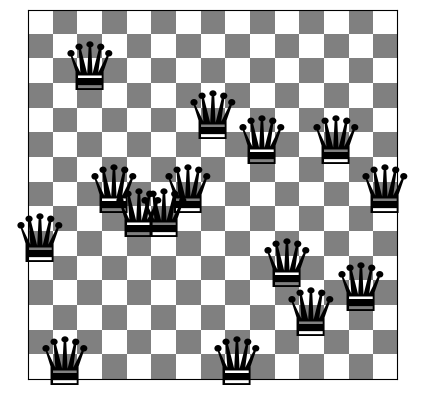

Stochastic Hill Climbing 3: 9 conflicts.
Stochastic Hill Climbing 4: 10 conflicts.
Stochastic Hill Climbing 5: 9 conflicts.


In [59]:
board = random_board(15)
show_board(board)
best_board = stochastic_climbing_3(board)
print(f"Stochastic Hill Climbing 3: {conflicts(best_board)} conflicts.")

best_board = stochastic_climbing_4(board)
print(f"Stochastic Hill Climbing 4: {conflicts(best_board)} conflicts.")

best_board = stochastic_climbing_5(board)
print(f"Stochastic Hill Climbing 5: {conflicts(best_board)} conflicts.")


In [60]:
stochastic_climbing_3_conflicts = []
stochastic_climbing_3_runtime = []
stochastic_climbing_4_conflicts = []
stochastic_climbing_4_runtime = []
stochastic_climbing_5_conflicts = []
stochastic_climbing_5_runtime = []

board_sizes = [15,20,25,30]

for size in board_sizes:
    conflicts_per_board = []
    runtimes = []

    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = stochastic_climbing_3(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))
    
    stochastic_climbing_3_conflicts.append(np.mean(conflicts_per_board))
    stochastic_climbing_3_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)

        start_time = time.time()
        best_board = stochastic_climbing_4(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))
    
    stochastic_climbing_4_conflicts.append(np.mean(conflicts_per_board))
    stochastic_climbing_4_runtime.append(np.mean(runtimes))

    conflicts_per_board = []
    runtimes = []
    for _ in range(50):
        board = random_board(size)
        start_time = time.time()
        best_board = stochastic_climbing_5(board)
        runtimes.append(time.time() - start_time)
        conflicts_per_board.append(conflicts(best_board))

    stochastic_climbing_5_conflicts.append(np.mean(conflicts_per_board))
    stochastic_climbing_5_runtime.append(np.mean(runtimes))


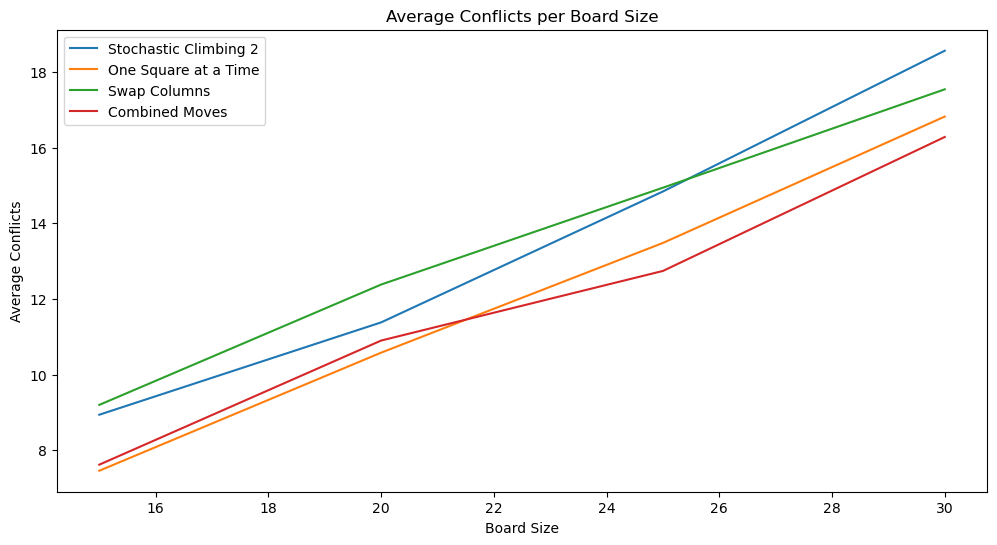

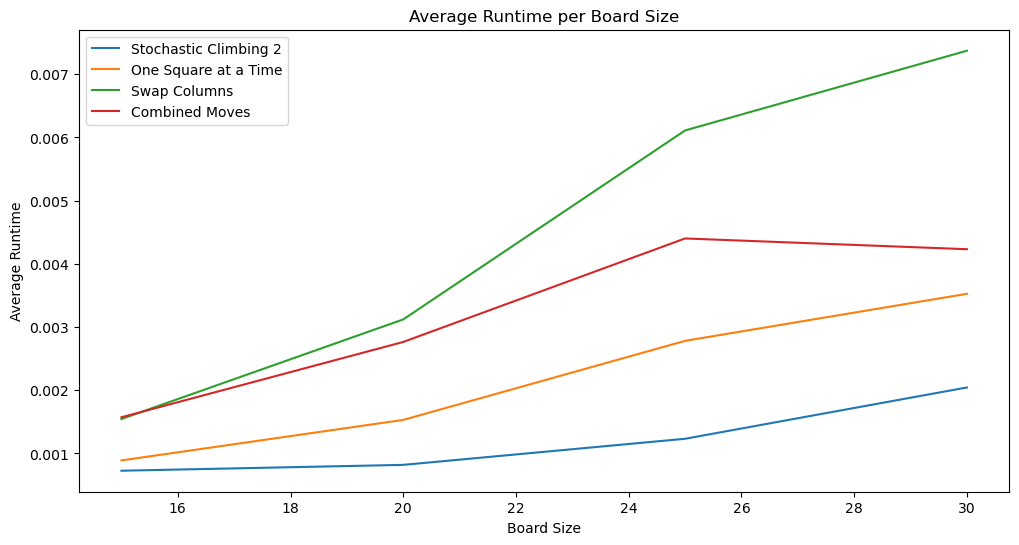

In [61]:
plt.figure(figsize=(12,6))
plt.plot(board_sizes, stochastic_climbing_2_conflicts, label='Stochastic Climbing 2')
plt.plot(board_sizes, stochastic_climbing_3_conflicts, label='One Square at a Time')
plt.plot(board_sizes, stochastic_climbing_4_conflicts, label='Swap Columns')
plt.plot(board_sizes, stochastic_climbing_5_conflicts, label='Combined Moves')
plt.xlabel('Board Size')
plt.ylabel('Average Conflicts')
plt.title('Average Conflicts per Board Size')
plt.legend()

plt.figure(figsize=(12,6))
plt.plot(board_sizes, stochastic_climbing_2_runtime, label='Stochastic Climbing 2')
plt.plot(board_sizes, stochastic_climbing_3_runtime, label='One Square at a Time')
plt.plot(board_sizes, stochastic_climbing_4_runtime, label='Swap Columns')
plt.plot(board_sizes, stochastic_climbing_5_runtime, label='Combined Moves')
plt.xlabel('Board Size')
plt.ylabel('Average Runtime')
plt.title('Average Runtime per Board Size')
plt.legend()
plt.show()

Based on the above graphs, it can be seen that in terms of average conflicts, the only new algorithm that does not perform better than Stochastic Hill Climbing 2 is the one that swaps columns. The other two new methods, moving one square at a time and combining moves, perform better than the original Stochastic Hill Climbing 2 with fewer number of conflicts on average across all boards. However, in terms of runtime, the new algorithms take much longer to run than the original. This makes sense since the new algorithms are doing more work than the original by having more local moves. The algorithm that swaps columns takes the longest time to run, then the combined moves, and then the one that moves one square at a time takes the least amount of time out of the newer algorithms.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here